## Observations and Insights 

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

study_data_complete = pd.merge(mouse_metadata,study_results, on = 'Mouse ID' )

# Display the data table for preview

study_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [121]:
# Checking the number of mice.
len(study_data_complete['Mouse ID'].unique())

249

In [122]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = study_data_complete[study_data_complete[['Mouse ID','Timepoint']].duplicated()]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [123]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_data_complete.drop_duplicates(subset = ['Mouse ID','Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [124]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

249

## Summary Statistics

In [32]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_data = clean_df.groupby('Drug Regimen')

tumor_volume_mean = grouped_data['Tumor Volume (mm3)'].mean()
tumor_volume_median = grouped_data['Tumor Volume (mm3)'].median()
tumor_volume_sd = grouped_data['Tumor Volume (mm3)'].std()
tumor_volume_sem = grouped_data['Tumor Volume (mm3)'].sem()


tumor_volume_summary_stat_df = pd.DataFrame({
    'mean' : tumor_volume_mean,
    'median' : tumor_volume_median,
    'std' : tumor_volume_sd,
    'sem' : tumor_volume_sem
})


tumor_volume_summary_stat_df

,mean,median,std,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.393463,50.909965,6.568014,0.525862
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [126]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumor_volume_summary_stat_df_alt = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median','std','sem'])
tumor_volume_summary_stat_df_alt

,mean,median,std,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.393463,50.909965,6.568014,0.525862
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

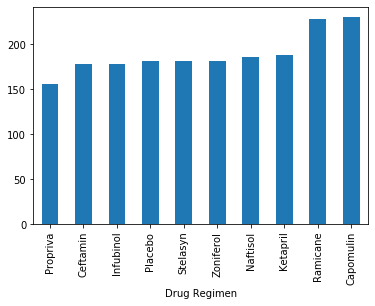

In [127]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
by_drugs = clean_df.groupby('Drug Regimen')

count_drugs = by_drugs['Drug Regimen'].count().sort_values()

count_drugs.plot(kind = 'bar')

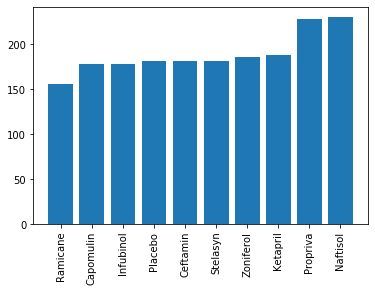

In [128]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_count = clean_df['Drug Regimen'].value_counts().sort_values()

#drugs = np.arange(len(clean_df['Drug Regimen'].unique()))
drugs =  clean_df['Drug Regimen'].unique()

plt.bar(drugs,drug_count)
plt.xticks(rotation='vertical')

plt.show()

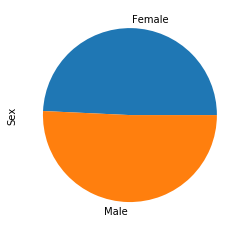

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
by_sex = clean_df.groupby('Sex')

count_sex = by_sex['Sex'].count()

count_sex.plot(kind = 'pie')

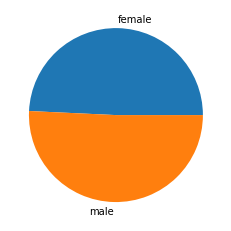

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_df['Sex'].value_counts().sort_values()
sex_labels = ['female','male']
plt.pie(sex_counts, labels = sex_labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [70]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [175]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_max_df = clean_df.groupby('Mouse ID').max()['Timepoint']
grouped_max_df.head()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [174]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(grouped_max_df,clean_df, how = 'left', on = ['Mouse ID','Timepoint'])
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [145]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

final_t_vol = []

In [146]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = merged_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

min_val = merged_df['Tumor Volume (mm3)'].min()
max_val = merged_df['Tumor Volume (mm3)'].max()
print(f'The minimum value is {min_val}')
print(f'The maximum value is {max_val}')

print(f'Thus there are no outliers in the set.')

The lower quartile of temperatures is: 45.93471217
The upper quartile of temperatures is: 64.95756185
The interquartile range of temperatures is: 19.022849680000007
The the median of temperatures is: 55.84141007 
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.
The minimum value is 22.05012627
The maximum value is 78.56701362
Thus there are no outliers in the set.


In [155]:
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    for treatment in treatments:
        
        treatment_df = merged_df[merged_df['Drug Regimen'] == treatment]
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds



In [156]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [16]:
#subset DF to only mice treated with Capomulin
cap_only = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

In [169]:
#generate list of mice IDs in this subset
mice_cap = cap_only['Mouse ID'].unique()
mice_cap

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

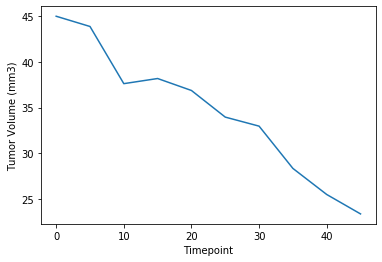

In [170]:
#take one mouse ID from the above list and create line graph
mouse_cap = clean_df[clean_df['Mouse ID'] == mice_cap[0]]

time = mouse_cap['Timepoint']
tumor_vol = mouse_cap['Tumor Volume (mm3)']

tumor_size, = plt.plot(time, tumor_vol)

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


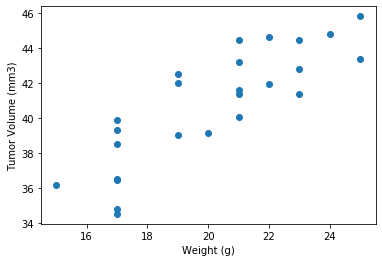

In [173]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_t_vol = cap_only.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = cap_only.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight,average_t_vol)

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

In [105]:
# Calculate the correlation coefficient 
grouped_cap_only = cap_only.groupby('Mouse ID').mean()
corr = st.pearsonr(grouped_cap_only['Weight (g)'],grouped_cap_only['Tumor Volume (mm3)'])
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {round(corr[0],2)}.")

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84.


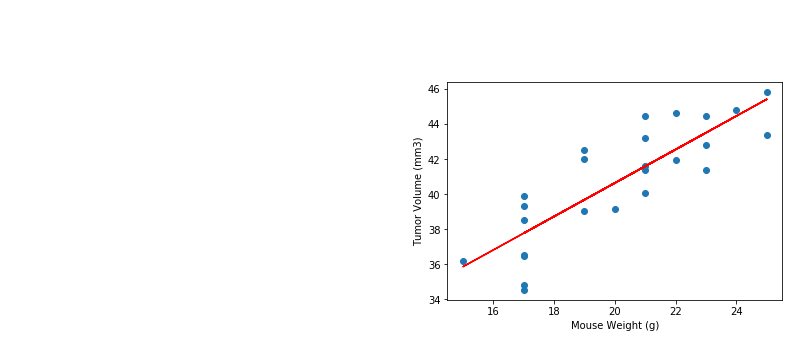

The r-squared is: 0.7088568047708717


In [172]:
# Calculate the linear regression model and plot
x_values = grouped_cap_only['Weight (g)']
y_values = grouped_cap_only['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
print(f"The r-squared is: {rvalue**2}")